install fast ai and import

In [1]:
!pip install -Uqq fastai
from fastai.vision.all import *

# Data preparation

import dataset

for datasets docs go to https://docs.fast.ai/data.external.html#image-classification-datasets although there is no info on 'FOOD'

In [2]:
foodPath = untar_data(URLs.FOOD)
len(get_image_files(foodPath))
pd.read_json('/root/.fastai/data/food-101/test.json')

,churros,hot_and_sour_soup,samosa,sashimi,pork_chop,spring_rolls,panna_cotta,beef_tartare,greek_salad,foie_gras,...,chicken_quesadilla,pho,prime_rib,cheesecake,ice_cream,omelette,grilled_cheese_sandwich,lobster_roll_sandwich,nachos,oysters
0,churros/1061830,hot_and_sour_soup/1000486,samosa/1009326,sashimi/100113,pork_chop/1012227,spring_rolls/1005480,panna_cotta/1006650,beef_tartare/101073,greek_salad/1010850,foie_gras/1007306,...,chicken_quesadilla/10257,pho/1002382,prime_rib/1006976,cheesecake/1023543,ice_cream/1004744,omelette/1019294,grilled_cheese_sandwich/1000938,lobster_roll_sandwich/1002698,nachos/1011831,oysters/1005672
1,churros/1064042,hot_and_sour_soup/1004564,samosa/1024186,sashimi/1017182,pork_chop/1019077,spring_rolls/103010,panna_cotta/1027460,beef_tartare/1029120,greek_salad/1029680,foie_gras/1044237,...,chicken_quesadilla/1030292,pho/1020153,prime_rib/102197,cheesecake/102854,ice_cream/1031536,omelette/1058816,grilled_cheese_sandwich/1003050,lobster_roll_sandwich/1029665,nachos/101954,oysters/1017801
2,churros/1074903,hot_and_sour_soup/1011278,samosa/1036216,sashimi/1043094,pork_chop/102958,spring_rolls/1036175,panna_cotta/1030883,beef_tartare/1030025,greek_salad/1053670,foie_gras/1073688,...,chicken_quesadilla/1052529,pho/1026354,prime_rib/102813,cheesecake/1073148,ice_cream/1075106,omelette/1116874,grilled_cheese_sandwich/1005927,lobster_roll_sandwich/103891,nachos/103312,oysters/1019666
3,churros/1085259,hot_and_sour_soup/1029400,samosa/103689,sashimi/1050391,pork_chop/1040432,spring_rolls/1044858,panna_cotta/103712,beef_tartare/1031053,greek_salad/1062715,foie_gras/1113614,...,chicken_quesadilla/1096804,pho/1028507,prime_rib/1035695,cheesecake/1092082,ice_cream/1100243,omelette/1122818,grilled_cheese_sandwich/100694,lobster_roll_sandwich/104300,nachos/1044020,oysters/1040557
4,churros/1097261,hot_and_sour_soup/1044215,samosa/1052427,sashimi/10551,pork_chop/1045605,spring_rolls/1067952,panna_cotta/1050629,beef_tartare/1066933,greek_salad/1101710,foie_gras/1125178,...,chicken_quesadilla/1102036,pho/1029709,prime_rib/105375,cheesecake/1096018,ice_cream/1106165,omelette/1145379,grilled_cheese_sandwich/1052563,lobster_roll_sandwich/1046809,nachos/1060157,oysters/1044823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,churros/904526,hot_and_sour_soup/963551,samosa/917040,sashimi/889209,pork_chop/92293,spring_rolls/949343,panna_cotta/97960,beef_tartare/926143,greek_salad/949442,foie_gras/953456,...,chicken_quesadilla/921154,pho/964800,prime_rib/940800,cheesecake/970606,ice_cream/880755,omelette/955537,grilled_cheese_sandwich/942123,lobster_roll_sandwich/91688,nachos/962352,oysters/967284
246,churros/937430,hot_and_sour_soup/968546,samosa/929017,sashimi/893381,pork_chop/929555,spring_rolls/950371,panna_cotta/980326,beef_tartare/948352,greek_salad/961722,foie_gras/961263,...,chicken_quesadilla/924555,pho/965012,prime_rib/941938,cheesecake/972877,ice_cream/891533,omelette/97045,grilled_cheese_sandwich/942187,lobster_roll_sandwich/931310,nachos/98976,oysters/967288
247,churros/938480,hot_and_sour_soup/982582,samosa/937665,sashimi/938288,pork_chop/934946,spring_rolls/951951,panna_cotta/981405,beef_tartare/956509,greek_salad/968471,foie_gras/982330,...,chicken_quesadilla/9290,pho/982022,prime_rib/956130,cheesecake/996516,ice_cream/923525,omelette/978714,grilled_cheese_sandwich/975531,lobster_roll_sandwich/946365,nachos/99050,oysters/978125
248,churros/95272,hot_and_sour_soup/984258,samosa/960937,sashimi/981801,pork_chop/942955,spring_rolls/990689,panna_cotta/98261,beef_tartare/976175,greek_salad/995103,foie_gras/98353,...,chicken_quesadilla/94597,pho/990037,prime_rib/958647,cheesecake/996918,ice_cream/995145,omelette/979117,grilled_cheese_sandwich/977481,lobster_roll_sandwich/962425,nachos/99088,oysters/978925


fix labeling and remove unnecessary data

In [4]:
labels=['samosa', 'hot_and_sour_soup', 'churros']
#Loop through all Images downloaded
for img in get_image_files(foodPath):
  #Rename Images so that the Label (Samosa or Churros) is in the file name
  if labels[0] in str(img):
    img.rename(f"{img.parent}/{labels[0]}-{img.name}")
  elif labels[1] in str(img):
    img.rename(f"{img.parent}/{labels[1]}-{img.name}")
  elif labels[2] in str(img):
    img.rename(f"{img.parent}/{labels[2]}-{img.name}")
  else: os.remove(img) #If the Images are not part of labelA or labelB

In [5]:
len(get_image_files(foodPath))

3000

# Training

create label function

In [11]:
def getLabel(fileName):
  return fileName.split('-')[0]

initiate data loader

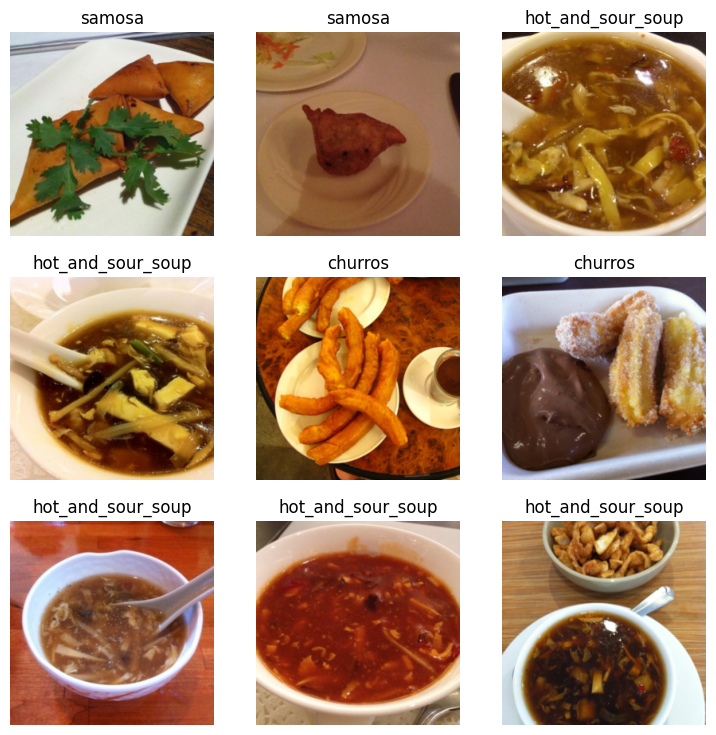

In [16]:
sizing = 256 #256 by 256
random_seed = 68

dls = ImageDataLoaders.from_name_func(
    foodPath, get_image_files(foodPath), valid_pct=0.2, seed=random_seed,
    label_func=getLabel, item_tfms=Resize(sizing))

dls.train.show_batch() # preview batch

Start training

In [29]:
learn = vision_learner(dls, resnet34, metrics=error_rate, pretrained=True)
learn.fine_tune(epochs=3)

epoch,train_loss,valid_loss,error_rate,time
0,0.585336,0.111372,0.033333,00:21


epoch,train_loss,valid_loss,error_rate,time
0,0.140061,0.073768,0.020000,00:22
1,0.086437,0.097253,0.030000,00:23
2,0.046900,0.084277,0.023333,00:22


# Testing

test with local image

Saving 409939780_6965587850233254_2361129322793532797_n.png to 409939780_6965587850233254_2361129322793532797_n.png


This is a churros.
samosa 0.000000002
hot_and_sour_soup 0.000000001
churros 1.000000000


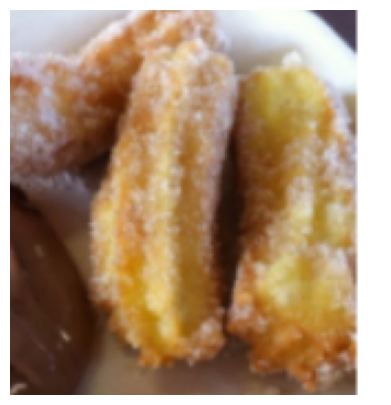

In [32]:
from google.colab import files
uploader = files.upload()

for img in uploader.items():
  uploadedImg = img[0]

img = PILImage.create(uploadedImg)
img.show()

label,_,probs = learn.predict(img)

print(f"This is a {label}.")
print(f"{labels[0]} {probs[2].item():.9f}")
print(f"{labels[1]} {probs[1].item():.9f}")
print(f"{labels[2]} {probs[0].item():.9f}")

test with dataset

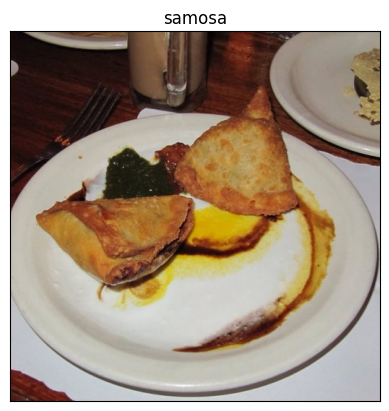

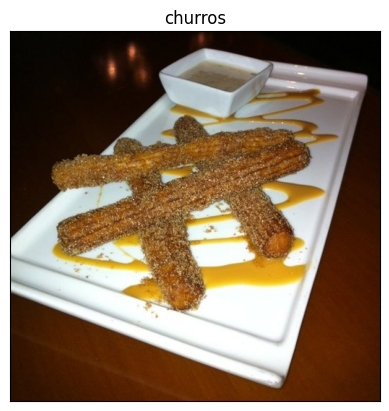

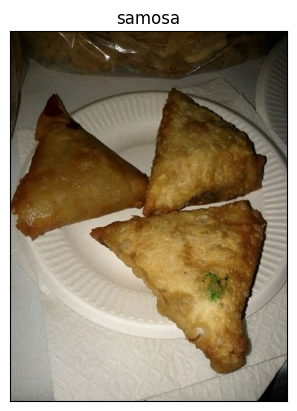

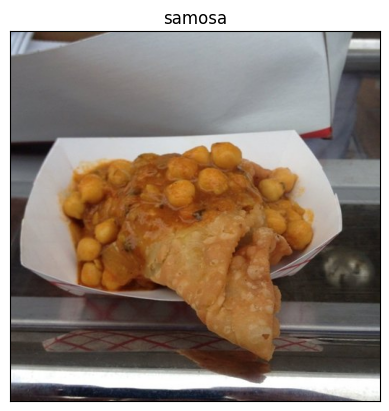

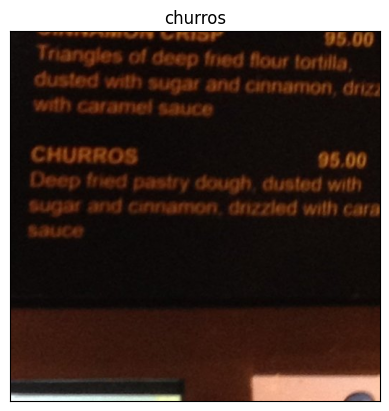

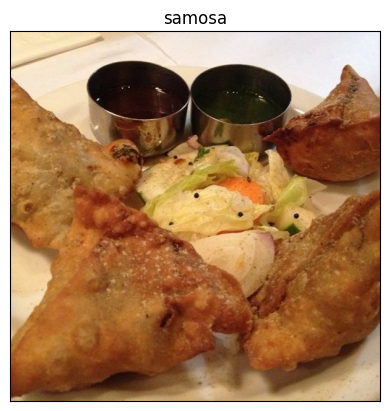

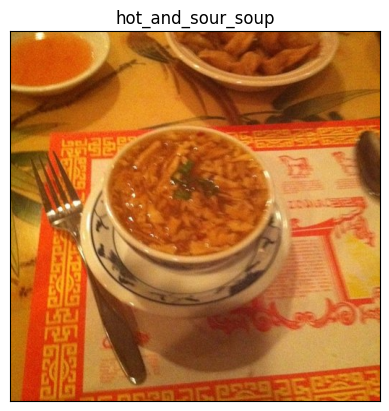

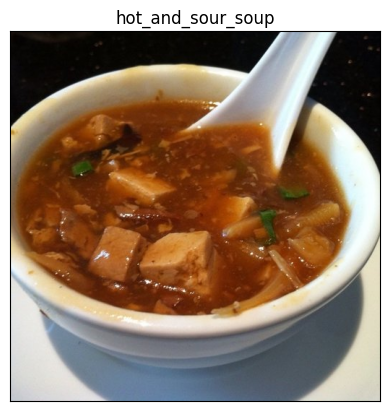

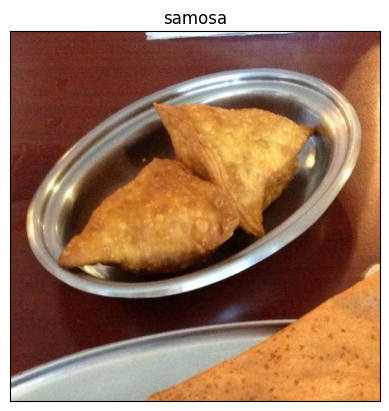

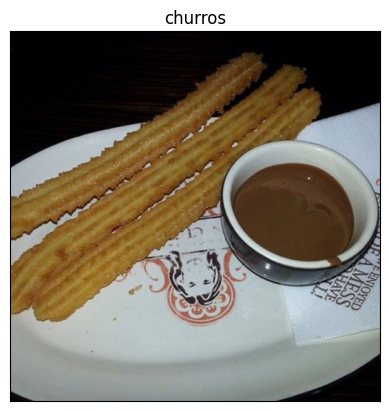

In [33]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

for i in range(0,10):
  #Load random image
  randomIndex = random.randint(0, len(get_image_files(foodPath))-1)
  img = mpimg.imread(get_image_files(foodPath)[randomIndex])
  #Put into Model
  label,_,probs = learn.predict(img)

  #Create Figure using Matplotlib
  fig = plt.figure()
  ax = fig.add_subplot() #Add Subplot (For multiple images)
  imgplot = plt.imshow(img) #Add Image into Plot
  ax.set_title(label) #Set Headline to predicted label

  #Hide numbers on axes
  plt.gca().axes.get_yaxis().set_visible(False)
  plt.gca().axes.get_xaxis().set_visible(False)

# Export model

In [50]:
from google.colab import files

learn.export() #exports model as 'export.pkl' by default
modelPath = get_files(foodPath, '.pkl')[0]

files.download(modelPath)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Accessing the model

In [55]:
learn_inf = load_learner(modelPath)
learn_inf.predict(mpimg.imread(get_image_files(foodPath)[1000])) #raw prediction


('churros', tensor(0), tensor([1.0000e+00, 5.1358e-08, 1.5088e-07]))

In [52]:
learn_inf.dls.vocab #Get the labels

['churros', 'hot_and_sour_soup', 'samosa']